In [3]:
%%configure -f
{
    "conf": {
        "spark.jars.packages": "com.johnsnowlabs.nlp:spark-nlp_2.12:4.3.1",
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
        "spark.driver.memory":"6000M"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1685153524298_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1685153524298_0003,pyspark,idle,Link,Link,✔


In [4]:
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")
sc.install_pypi_package('spark-nlp')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
spark.sparkContext.getConf().get('spark.driver.memory')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'6000M'

## Load Data From S3 Bucket

In [4]:
import boto3

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
s3 = boto3.client('s3', region_name = "us-east-1")
s3_resource = boto3.resource('s3')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
bucket = 'reddit-bucket-yingzi'
bucket_resource = s3_resource.Bucket(bucket)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
[obj.key for obj in bucket_resource.objects.all()]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['comments.parquet', 'posts.parquet']

In [6]:
data_comments = spark.read.parquet('s3://reddit-bucket-yingzi/comments.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
data_posts = spark.read.parquet('s3://reddit-bucket-yingzi/posts.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Data Overview

In [10]:
print('Total Columns: %d' % len(data_comments.dtypes))
print('Total Rows: %d' % data_comments.count())
data_comments.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 6
Total Rows: 20889
root
 |-- subreddit: string (nullable = true)
 |-- post_id: integer (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- comment_body: string (nullable = true)
 |-- post_url: string (nullable = true)
 |-- comment_id: string (nullable = true)

In [11]:
print('Total Columns: %d' % len(data_posts.dtypes))
print('Total Rows: %d' % data_posts.count())
data_posts.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 8
Total Rows: 4266
root
 |-- subreddit: string (nullable = true)
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- score: long (nullable = true)
 |-- url: string (nullable = true)
 |-- comms_num: long (nullable = true)
 |-- body: string (nullable = true)
 |-- ups: long (nullable = true)

In [12]:
data_posts.show(20)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------+--------------------+-----+--------------------+---------+--------------------+---+
|       subreddit|     id|               title|score|                 url|comms_num|                body|ups|
+----------------+-------+--------------------+-----+--------------------+---------+--------------------+---+
|MovieSuggestions| 8iamsh|Using This Subreddit|  441|https://www.reddi...|        0|#Community Guidel...|441|
|MovieSuggestions|13rdrju|Movies that start...|  152|https://www.reddi...|      346|I want to see if ...|152|
|MovieSuggestions|13rk7yu|What is the oldes...|   39|https://www.reddi...|      110|How new does a fi...| 39|
|MovieSuggestions|13rp45d|Just watched Mand...|   22|https://www.reddi...|        9|What a trip man w...| 22|
|MovieSuggestions|13rklpr|The most underrat...|   27|https://www.reddi...|       58|May (2002), Excis...| 27|
|MovieSuggestions|13rscki|Recommendations o...|    6|https://www.reddi...|       25|Hey,  
I have bee...|  6|
|         

In [13]:
data_comments.show(20)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------+-------------+--------------------+--------------------+----------+
|subreddit|post_id|comment_score|        comment_body|            post_url|comment_id|
+---------+-------+-------------+--------------------+--------------------+----------+
| Firearms|   null|           33|The founders were...|https://www.reddi...|   jk9wvum|
| Firearms|   null|           12|All I do is point...|https://www.reddi...|   jk9vexm|
| Firearms|   null|            5|Well stated Sir, ...|https://www.reddi...|   jkax7ik|
| Firearms|   null|            3|I’m so stoked for...|https://www.reddi...|   jkbwsn1|
| Firearms|   null|            3|If you're buildin...|https://www.reddi...|   jjbw28c|
| Firearms|   null|            2|The 2nd Amendment...|https://www.reddi...|   jkacxd5|
| Firearms|   null|            2|Just buy a real S...|https://www.reddi...|   jjb2bnc|
| Firearms|   null|            3|Sounds like a gre...|https://www.reddi...|   jk2czwd|
| Firearms|   null|            3|There are 

In [14]:
data_posts.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4266

In [15]:
data_comments.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

20889

## Data Cleaning

In [8]:
from pyspark.sql.functions import col

data_posts = data_posts.filter(col('body') != "[deleted]")
data_comments = data_comments.filter(col('comment_body') != "[deleted]")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
from pyspark.sql.functions import regexp_replace

# Remove URL links from the text column
link_reg = r"http\S+|www\S+"

data_posts = data_posts.withColumn("body", regexp_replace(data_posts.body, link_reg, ""))
data_posts = data_posts.withColumn("title", regexp_replace(data_posts.title, link_reg, ""))
data_comments = data_comments.withColumn("comment_body", regexp_replace(data_comments.comment_body, link_reg, ""))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
email_reg = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"

# Remove email from the text column
data_posts = data_posts.withColumn("body", regexp_replace(data_posts.body, email_reg, ""))
data_posts = data_posts.withColumn("title", regexp_replace(data_posts.title, email_reg, ""))
data_comments = data_comments.withColumn("comment_body", regexp_replace(data_comments.comment_body, email_reg, ""))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# manually remove posts of community rules

titles = ['What are you building, buying, or shooting this month? - May 2023', 
         'rule 7 applies to Pro-life users as well',
         'Rules and Debate Resources',
         'New pro-life mod positions open',
         'Using This Subreddit',
         'General Discussion, Suggestion, & List Thread - Week of May 25, 2023']

data_rules = data_posts.filter(data_posts['title'].isin(titles))
data_posts = data_posts.filter(~data_posts['title'].isin(titles))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
# remove comments of the community rule posts
data_comments = data_comments.join(data_rules, data_comments["post_url"] == data_posts["url"], "left_anti")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# remove duplicate posts

data_posts = data_posts.dropDuplicates(['body'])
data_posts = data_posts.dropDuplicates(['title'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# remove duplicate comments

data_comments = data_comments.dropDuplicates(['comment_body'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
data_posts.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4049

In [24]:
data_comments.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

18505

## EDA

### 1. Groupby Subreddit

In [26]:
subreddits = data_posts.select('subreddit').distinct().collect()
subreddits

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(subreddit='movies'), Row(subreddit='prolife'), Row(subreddit='Firearms'), Row(subreddit='prochoice'), Row(subreddit='Music'), Row(subreddit='MovieSuggestions'), Row(subreddit='gunpolitics'), Row(subreddit='Abortiondebate'), Row(subreddit='LetsTalkMusic')]

In [27]:
ct_sbred_post = data_posts.groupBy('subreddit').count()
ct_sbred_post.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+
|       subreddit|count|
+----------------+-----+
|          movies|  299|
|         prolife|  417|
|        Firearms|  495|
|       prochoice|  308|
|           Music|  278|
|MovieSuggestions|  789|
|     gunpolitics|  282|
|  Abortiondebate|  811|
|   LetsTalkMusic|  370|
+----------------+-----+

In [28]:
ct_sbred_cmt = data_comments.groupBy('subreddit').count()
ct_sbred_cmt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+
|       subreddit|count|
+----------------+-----+
|          movies| 2392|
|         prolife|  595|
|        Firearms| 3733|
|       prochoice| 1592|
|           Music|  750|
|MovieSuggestions| 3240|
|     gunpolitics|  713|
|  Abortiondebate| 2981|
|   LetsTalkMusic| 2509|
+----------------+-----+

In [16]:
music_sbred = ['Music', 'LetsTalkMusic']
movie_sbred = ['movies', 'MovieSuggestions']
gun_sbred = ['Firearms', 'gunpolitics']
abortion_sbred = ['prolife', 'prochoice', 'Abortiondebate']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Add columns (topic) and (moral_conviction)

In [17]:
from pyspark.sql.functions import col, when

df_posts = data_posts.withColumn('topic',
                              when(col('subreddit').isin(music_sbred), 'music')
                              .when(col('subreddit').isin(movie_sbred), 'movie')
                              .when(col('subreddit').isin(gun_sbred), 'gun')
                              .when(col('subreddit').isin(abortion_sbred), 'abortion'))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
df_posts = df_posts.withColumn('moral_conviction',
                              when(col('topic').isin(['music','movie']), 0)
                              .when(col('topic').isin(['gun', 'abortion']), 1))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
df_posts[['topic','moral_conviction']].show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+----------------+
|   topic|moral_conviction|
+--------+----------------+
|abortion|               1|
|     gun|               1|
|     gun|               1|
|     gun|               1|
|abortion|               1|
+--------+----------------+
only showing top 5 rows

In [33]:
ct_topic_post = df_posts.groupBy('topic').count()
ct_topic_post.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+
|   topic|count|
+--------+-----+
|   music|  648|
|   movie| 1088|
|abortion| 1536|
|     gun|  777|
+--------+-----+

In [34]:
ct_moral_post = df_posts.groupBy('moral_conviction').count()
ct_moral_post.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+
|moral_conviction|count|
+----------------+-----+
|               1| 2312|
|               0| 1737|
+----------------+-----+

In [19]:
df_comments = data_comments.withColumn('topic',
                              when(col('subreddit').isin(music_sbred), 'music')
                              .when(col('subreddit').isin(movie_sbred), 'movie')
                              .when(col('subreddit').isin(gun_sbred), 'gun')
                              .when(col('subreddit').isin(abortion_sbred), 'abortion'))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df_comments = df_comments.withColumn('moral_conviction',
                              when(col('topic').isin(['music','movie']), 0)
                              .when(col('topic').isin(['gun', 'abortion']), 1))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
df_posts[['topic','moral_conviction']].show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+----------------+
|   topic|moral_conviction|
+--------+----------------+
|abortion|               1|
|     gun|               1|
|     gun|               1|
|     gun|               1|
|abortion|               1|
+--------+----------------+
only showing top 5 rows

In [38]:
ct_topic_cmt = df_comments.groupBy('topic').count()
ct_topic_cmt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+
|   topic|count|
+--------+-----+
|   music| 3259|
|   movie| 5632|
|abortion| 5168|
|     gun| 4446|
+--------+-----+

In [39]:
ct_moral_cmt = df_comments.groupBy('moral_conviction').count()
ct_moral_cmt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+
|moral_conviction|count|
+----------------+-----+
|               1| 9614|
|               0| 8891|
+----------------+-----+

#### Plot the Counts

In [40]:
grouped_pd = ct_topic_post.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 

def plot_ct(pd, col, xlabel, title):
    plt.close()

    sns.set_style('whitegrid')
    sns.barplot(grouped_pd[col], grouped_pd['count'])

    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(title)
    
    return plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

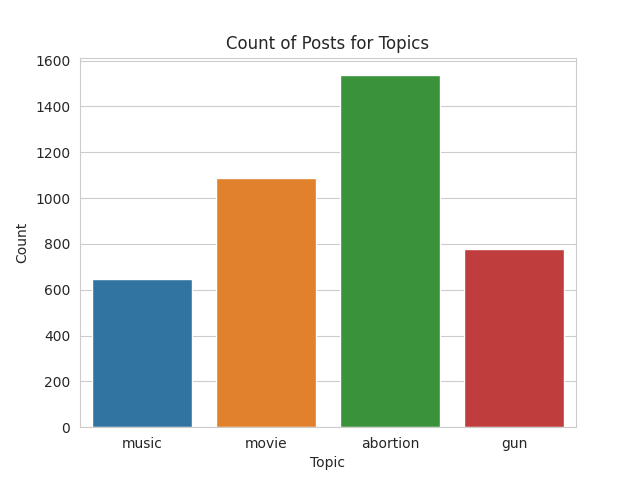

In [42]:
plt = plot_ct(grouped_pd, 'topic', 'Topic', 'Count of Posts for Topics')
%matplot plt

In [43]:
grouped_pd = ct_moral_post.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

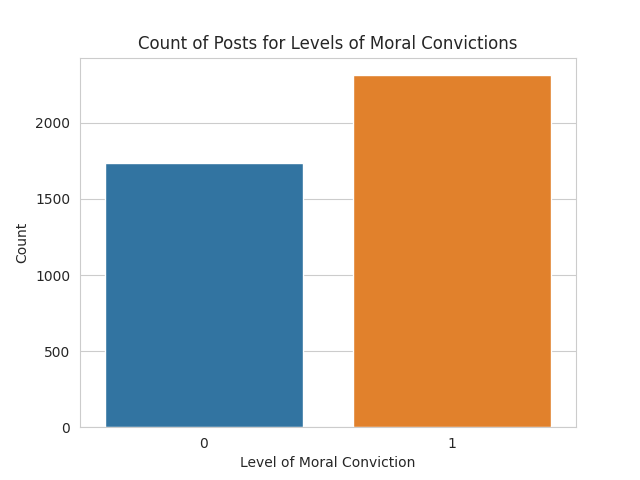

In [44]:
plt = plot_ct(grouped_pd, 'moral_conviction', 'Level of Moral Conviction', 'Count of Posts for Levels of Moral Convictions')
%matplot plt

In [45]:
grouped_pd = ct_topic_cmt.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

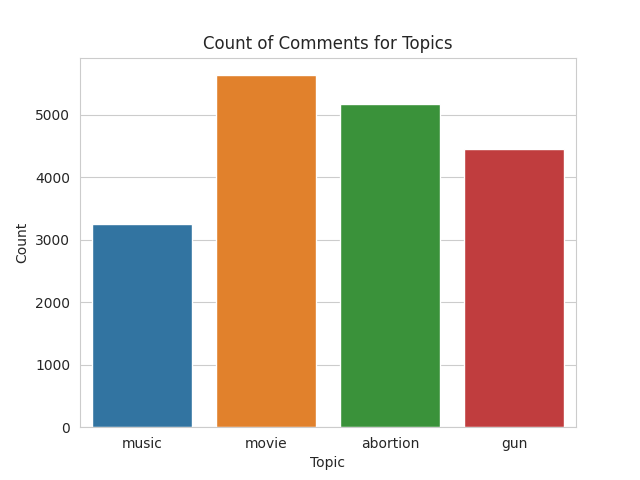

In [46]:
plt = plot_ct(grouped_pd, 'topic', 'Topic', 'Count of Comments for Topics')
%matplot plt

In [47]:
grouped_pd = ct_moral_cmt.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

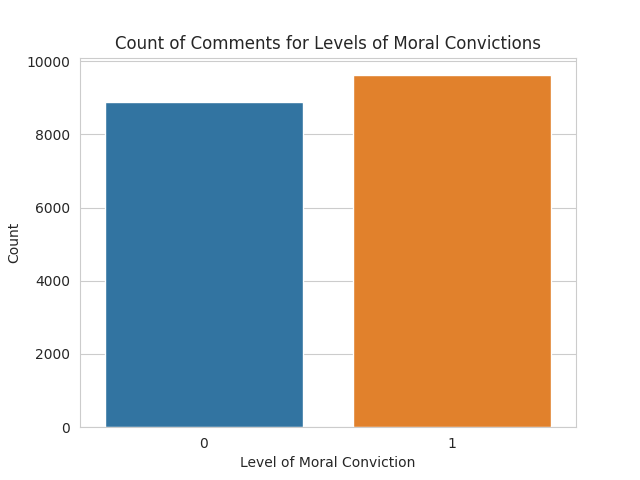

In [48]:
plt = plot_ct(grouped_pd, 'moral_conviction', 'Level of Moral Conviction', 'Count of Comments for Levels of Moral Convictions')
%matplot plt

Overall, there are more posts with high-level than low-level moral conviction, where abortion-related subreddits contributes the most amount of posts. This might because we scraped three abortion-related subreddits, while only two for other topics. In terms of comments, the counts for two levels of moral conviction are very similar. In general, we have balanced dataset across topics and levels of moral conviction.

### 2. Engagement

For post, two metrics of engagement: score and number of comments <br>
For comment, one metric of engagement: score

Score: upvotes - downvotes <br>

For post, overall engagement score: abs(score) + number of comments

#### For post, check the summary of score

In [49]:
summary = df_posts.select('score').summary()
summary.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|             score|
+-------+------------------+
|  count|              4049|
|   mean|58.263521857248705|
| stddev| 751.3876214468679|
|    min|                 0|
|    25%|                 2|
|    50%|                11|
|    75%|                38|
|    max|             46036|
+-------+------------------+

#### For post, check the summary of count of comments

In [50]:
summary = df_posts[['comms_num']].summary()
summary.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|        comms_num|
+-------+-----------------+
|  count|             4049|
|   mean|74.97011607804396|
| stddev|148.2797315900136|
|    min|                0|
|    25%|                8|
|    50%|               24|
|    75%|               79|
|    max|             3844|
+-------+-----------------+

#### For comments, check the summary of score

In [51]:
summary = df_comments.select('comment_score').summary()
summary.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|     comment_score|
+-------+------------------+
|  count|             18505|
|   mean|   8.7340718724669|
| stddev|37.243245809031436|
|    min|               -73|
|    25%|                 1|
|    50%|                 2|
|    75%|                 7|
|    max|              1541|
+-------+------------------+

#### Calculate the engagement score for posts and comments
For posts, engagemnt = abs(score) + comms_num <br>
Since all scores of posts are positive, we simply add the score and comms_num to have the engagement score.

For comments, engagement = abs(score) (negative score means there are more downvotes than upvotes)

In [71]:
df_posts = df_posts.withColumn("engagement", df_posts['score'] + df_posts['comms_num'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
summary = df_posts.select('engagement').summary()
summary.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        engagement|
+-------+------------------+
|  count|              4049|
|   mean|133.19930847122745|
| stddev| 829.2856863258743|
|    min|                 0|
|    25%|                15|
|    50%|                44|
|    75%|               144|
|    max|             49528|
+-------+------------------+

In [72]:
df_posts = df_posts.withColumn('binary_engage', when(col('engagement') > 0, 1).otherwise(0))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
ct_bi_engage = df_posts.groupBy('binary_engage').count()
ct_bi_engage.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|binary_engage|count|
+-------------+-----+
|            1| 3971|
|            0|   78|
+-------------+-----+

In [73]:
from pyspark.sql.functions import abs

df_comments = df_comments.withColumn('engagement', abs(df_comments['comment_score']))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
df_comments = df_comments.withColumn('binary_engage', when(col('engagement') > 0, 1).otherwise(0))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
ct_bi_score_cmt = df_comments.groupBy('binary_engage').count()
ct_bi_score_cmt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|binary_engage|count|
+-------------+-----+
|            1|18101|
|            0|  404|
+-------------+-----+

Overall, both posts and comments have some engagement, and the variation of each metric is wide. 

### 3. Sentiment/Emotion

#### Calculate the sentiment (valence and intensity) <br>
- VADER Package

In [21]:
# install vader 
sc.install_pypi_package("vaderSentiment==3.3.2")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
def calculate_intensity(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
def get_valence(compound):
    if compound <= -0.05:
        return 'neg'
    elif compound >= 0.05:
        return 'pos'
    else:
        return 'neu'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### post body

In [25]:
import pyspark.sql.functions as F

calculate_intensity_udf = F.udf(calculate_intensity)

df_posts = df_posts.withColumn('body_intensity', calculate_intensity_udf(F.col('body')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
label_valence_udf = F.udf(get_valence)
df_posts = df_posts.withColumn('body_valence', label_valence_udf(F.col('body_intensity')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### post title

In [27]:
df_posts = df_posts.withColumn('title_intensity', calculate_intensity_udf(F.col('title')))
df_posts = df_posts.withColumn('title_valence', label_valence_udf(F.col('title_intensity')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### comment body

In [28]:
df_comments = df_comments.withColumn('body_intensity', calculate_intensity_udf(F.col('comment_body')))
df_comments = df_comments.withColumn('body_valence', label_valence_udf(F.col('body_intensity')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Calculate absolute intensity

In [31]:
df_posts = df_posts.withColumn('abs_body_intensity', abs(col('body_intensity')))
df_posts = df_posts.withColumn('abs_title_intensity', abs(col('title_intensity')))
df_comments = df_comments.withColumn('abs_body_intensity', abs(col('body_intensity')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Overview of sentiment

In [68]:
def intensity_hist(pd, body, content, bin_num, absolute):
    plt.close()
    
    sns.set_style('white')
    if absolute:
        column = 'abs_'
        label = 'Absolute'
        minimum = 0
    else:
        column = ''
        label = ''
        minimum = -1
        
    if body:
        column = column + 'body_intensity'
    else:
        column = column + 'title_intensity'
 
    
    sns.distplot(pd[column], bins=bin_num)
        
    plt.xlim(minimum, 1)
    plt.title(f"Distribution of {label} Sentiment Intensity of {content}")
    plt.xlabel(f"{label} Sentiment Intensity")
    plt.ylabel("Frequency")
    
    return plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [69]:
posts_sentiment_pd = df_posts[['body_intensity', 'title_intensity', 
                               'abs_body_intensity', 'abs_title_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

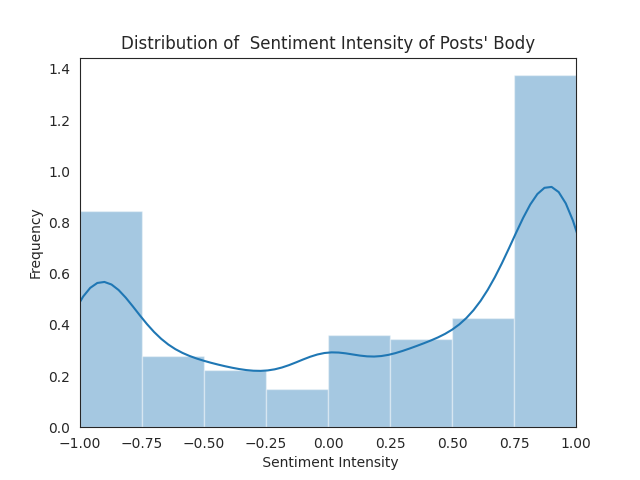

In [70]:
plt = intensity_hist(posts_sentiment_pd, True, "Posts' Body", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

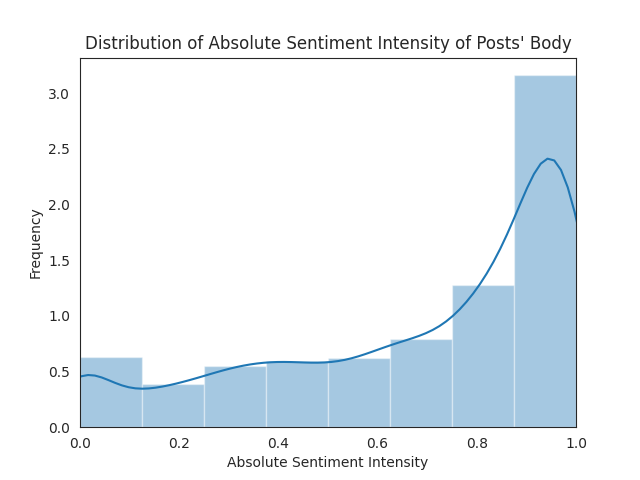

In [71]:
plt = intensity_hist(posts_sentiment_pd, True, "Posts' Body", 8, True)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

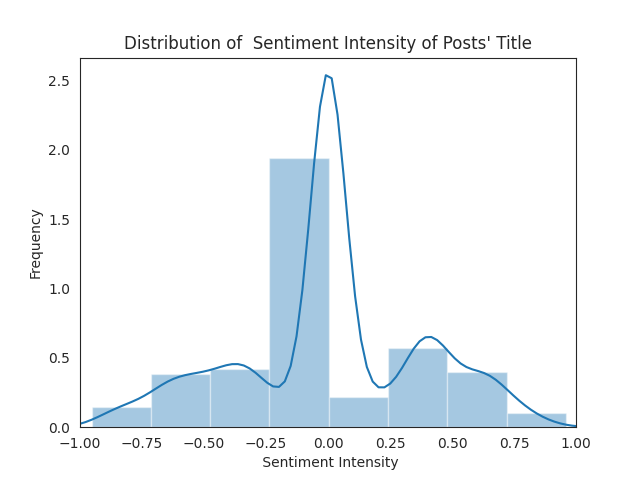

In [72]:
plt = intensity_hist(posts_sentiment_pd, False, "Posts' Title", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

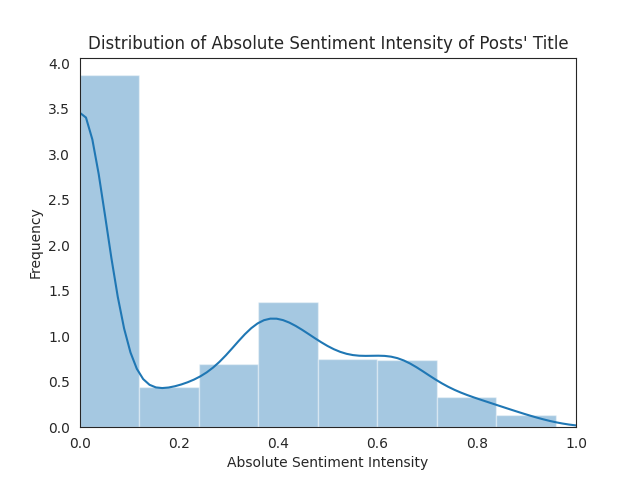

In [73]:
plt = intensity_hist(posts_sentiment_pd, False, "Posts' Title", 8, True)
%matplot plt

In [74]:
comments_sentiment_pd = df_comments[['body_intensity', 'abs_body_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

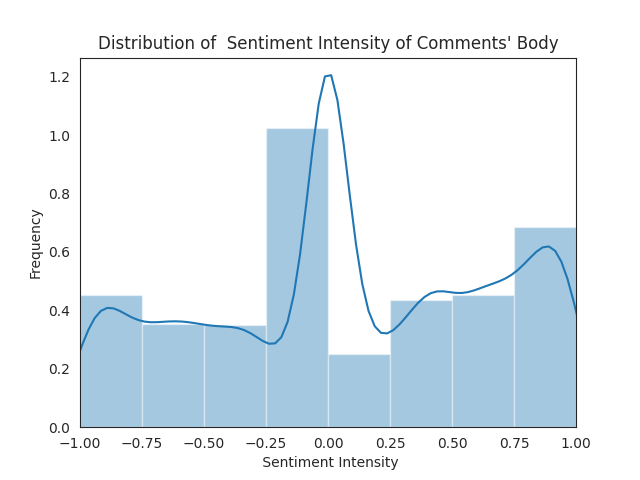

In [75]:
plt = intensity_hist(comments_sentiment_pd, True, "Comments' Body", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

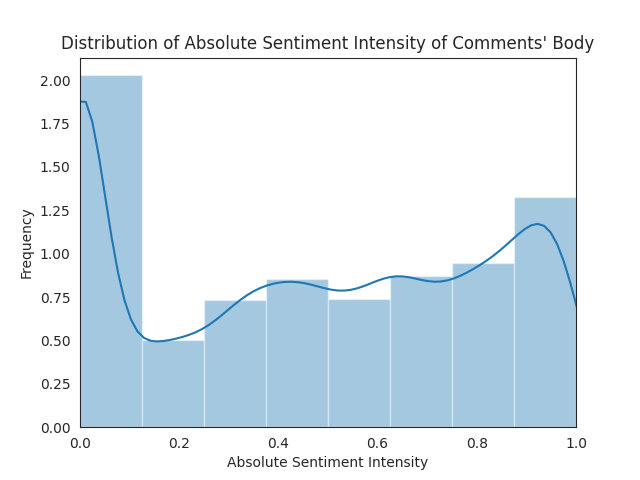

In [76]:
plt = intensity_hist(comments_sentiment_pd, True, "Comments' Body", 8, True)
%matplot plt

#### Sentiment intensity vs. moral conviction

In [77]:
df_posts_high_mc = df_posts.filter(df_posts['moral_conviction']==1)
df_posts_low_mc = df_posts.filter(df_posts['moral_conviction']==0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
df_cmts_high_mc = df_comments.filter(df_comments['moral_conviction']==1)
df_cmts_low_mc = df_comments.filter(df_comments['moral_conviction']==0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
def intensity_hist_moral(pd_high, pd_low, body, content, bin_num, absolute):
    plt.close()
    
    sns.set_style('white')
    if absolute:
        column = 'abs_'
        label = "Absolute"
        minimum = 0
    else:
        column = ''
        label = ""
        minimum = -1
        
    if body:
        column = column + 'body_intensity'
    else:
        column = column + 'title_intensity'
        
    sns.distplot(pd_high[column], label='High', bins=bin_num)
    sns.distplot(pd_low[column], label='Low', bins=bin_num)
        
    plt.xlim(minimum, 1)
    plt.title(f"Distribution of {label} Sentiment Intensity of {content}")
    plt.xlabel(f"{label} Sentiment Intensity")
    plt.ylabel("Frequency")
    plt.legend(title='Moral Conviction')
    
    return plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
posts_high_mc_pd = df_posts_high_mc[['body_intensity', 'title_intensity', 
                                     'abs_body_intensity', 'abs_title_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [81]:
posts_low_mc_pd = df_posts_low_mc[['body_intensity', 'title_intensity',
                                  'abs_body_intensity', 'abs_title_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

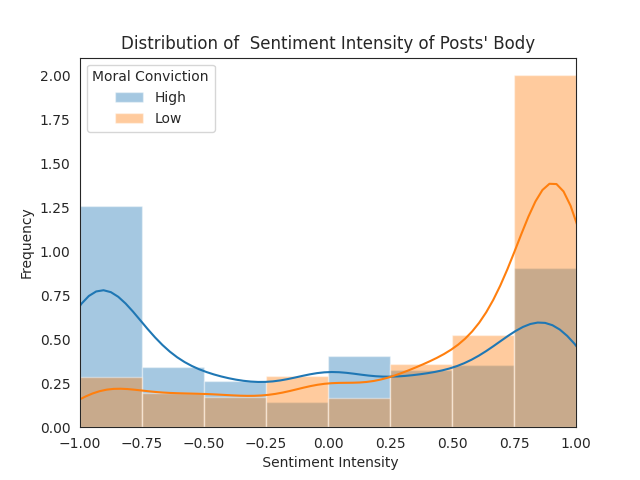

In [82]:
plt = intensity_hist_moral(posts_high_mc_pd, posts_low_mc_pd, True, "Posts' Body", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

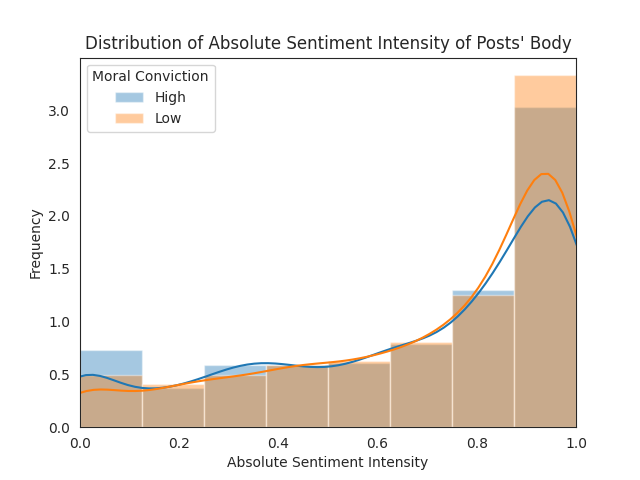

In [83]:
plt = intensity_hist_moral(posts_high_mc_pd, posts_low_mc_pd, True, "Posts' Body", 8, True)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

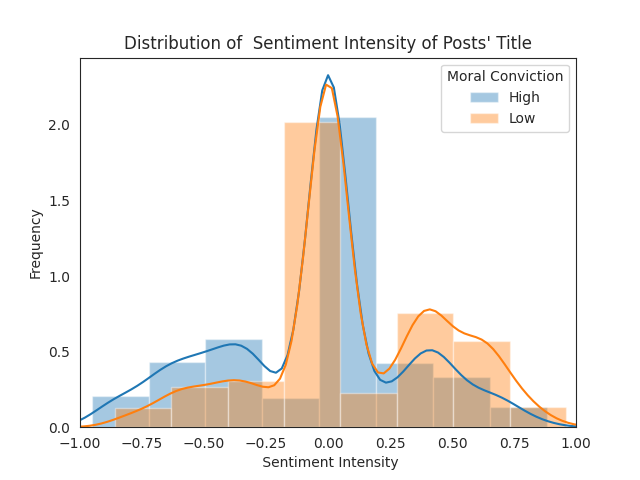

In [84]:
plt = intensity_hist_moral(posts_high_mc_pd, posts_low_mc_pd, False, "Posts' Title", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

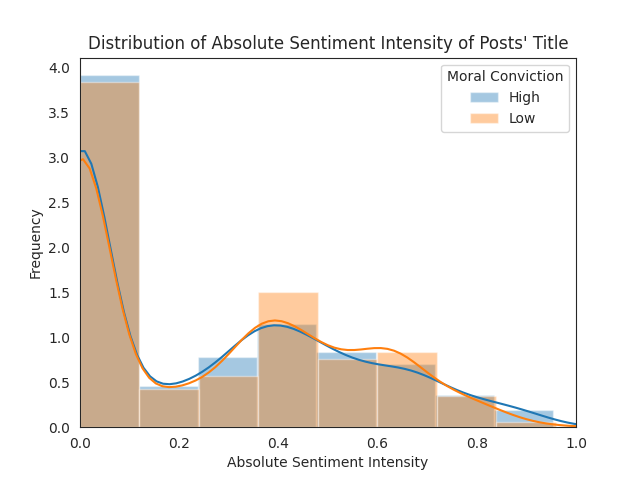

In [85]:
plt = intensity_hist_moral(posts_high_mc_pd, posts_low_mc_pd, False, "Posts' Title", 8, True)
%matplot plt

In [86]:
cmts_high_mc_pd = df_cmts_high_mc[['body_intensity', 'abs_body_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
cmts_low_mc_pd = df_cmts_low_mc[['body_intensity', 'abs_body_intensity']].toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

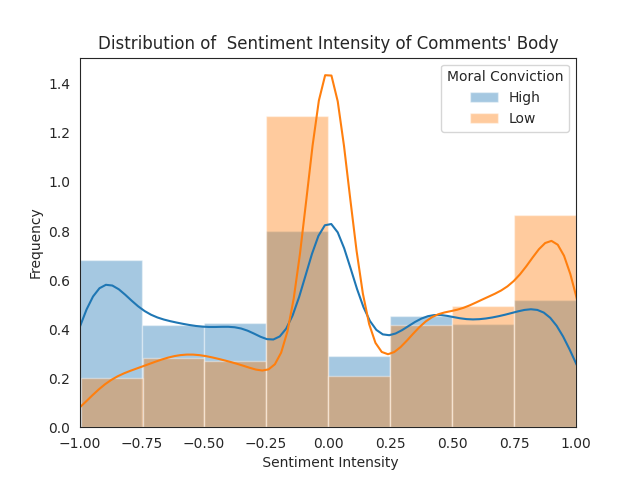

In [88]:
plt = intensity_hist_moral(cmts_high_mc_pd, cmts_low_mc_pd, True, "Comments' Body", 8, False)
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

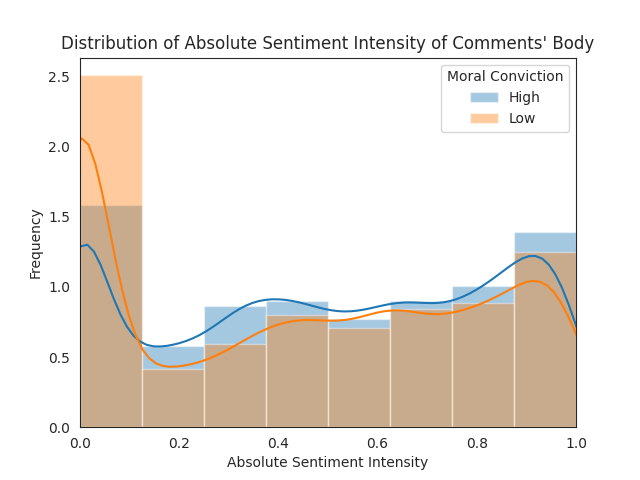

In [89]:
plt = intensity_hist_moral(cmts_high_mc_pd, cmts_low_mc_pd, True, "Comments' Body", 8, True)
%matplot plt

#### Emotion 

- Spark NLP

In [32]:
import json
import pandas as pd
import numpy as np

import sparknlp
import pyspark.sql.functions as F

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.types import StringType, IntegerType

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
MODEL_NAME='classifierdl_use_emotion'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
def pipe(column_name):
    documentAssembler = DocumentAssembler() \
        .setInputCol(column_name) \
        .setOutputCol("document")

    use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en") \
        .setInputCols(["document"]) \
        .setOutputCol("sentence_embeddings")

    sentimentdl = ClassifierDLModel.pretrained(name=MODEL_NAME) \
        .setInputCols(["sentence_embeddings"]) \
        .setOutputCol("sentiment")

    nlpPipeline = Pipeline(stages=[documentAssembler, use, sentimentdl])
    return nlpPipeline

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
def run_pipeline(column_name, df):
    text = df.select(column_name)
    pipeline = pipe(column_name)
    cls_results = pipeline.fit(text).transform(text)
    return cls_results

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Classify posts body

In [36]:
def add_emotion(df, post, body):
    if post:
        column = ""
    else:
        column = "comment_"
        
    if body:
        column = column + 'body'
    else:
        column = 'title'
    
    clf = run_pipeline(column, df)
    emo = clf.select(F.explode(F.arrays_zip(clf.document.result,
                                            clf.sentiment.result)).alias("cols")).select(F.expr("cols['0']").alias(column),
                                                                                         F.expr("cols['1']").alias(column+"_emotion"))
    df_emotion = df.join(emo, on=column)
#     df_emotion = df_emotion[['id', column + "_emotion"]]
    
    return df_emotion

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
posts_emo = add_emotion(df_posts, True, True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]

In [38]:
df_posts = add_emotion(posts_emo, True, False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]

In [39]:
df_posts.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4049

In [40]:
df_posts.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- title: string (nullable = true)
 |-- body: string (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)
 |-- url: string (nullable = true)
 |-- comms_num: long (nullable = true)
 |-- ups: long (nullable = true)
 |-- topic: string (nullable = true)
 |-- moral_conviction: integer (nullable = true)
 |-- body_intensity: string (nullable = true)
 |-- body_valence: string (nullable = true)
 |-- title_intensity: string (nullable = true)
 |-- title_valence: string (nullable = true)
 |-- abs_body_intensity: double (nullable = true)
 |-- abs_title_intensity: double (nullable = true)
 |-- body_emotion: string (nullable = true)
 |-- title_emotion: string (nullable = true)

In [41]:
df_comments = add_emotion(df_comments, False, True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]

In [42]:
df_comments.printSchema()
df_comments.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- comment_body: string (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- post_id: integer (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- post_url: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- moral_conviction: integer (nullable = true)
 |-- body_intensity: string (nullable = true)
 |-- body_valence: string (nullable = true)
 |-- abs_body_intensity: double (nullable = true)
 |-- comment_body_emotion: string (nullable = true)

18505

In [43]:
null_check1 = df_posts.select(F.col('body_emotion').isNull().cast("int").alias("is_null")).agg(F.sum("is_null"))
null_check2 = df_posts.select(F.col('title_emotion').isNull().cast("int").alias("is_null")).agg(F.sum("is_null"))
null_check3 = df_comments.select(F.col('comment_body_emotion').isNull().cast("int").alias("is_null")).agg(F.sum("is_null"))


# Get the count of null values
print(null_check1.collect()[0][0],
      null_check2.collect()[0][0],
      null_check3.collect()[0][0])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1 1 1

In [44]:
df_posts = df_posts.na.drop(subset=["body_emotion"])
df_posts = df_posts.na.drop(subset=["title_emotion"])
df_comments = df_comments.na.drop(subset=["comment_body_emotion"])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Overview of Emotion

In [ ]:
df_posts.printSchema()

In [ ]:
df_posts[['body']].count()

In [143]:
ct_emotion_post_body = df_posts.groupBy('body_emotion').count()
ct_emotion_post_body.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|body_emotion|count|
+------------+-----+
|         joy|  466|
|        fear| 2758|
|     sadness|  471|
|    surprise|  353|
+------------+-----+

In [147]:
grouped_pd = ct_emotion_post_body.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

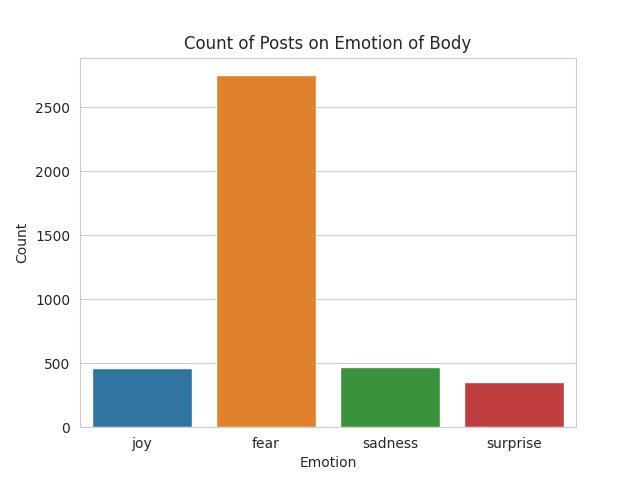

In [149]:
plt = plot_ct(grouped_pd, 'body_emotion', 'Emotion', "Count of Posts on Emotion of Body")
%matplot plt

In [144]:
ct_emotion_post_title = df_posts.groupBy('title_emotion').count()
ct_emotion_post_title.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|title_emotion|count|
+-------------+-----+
|         null|    1|
|          joy|  695|
|         fear| 1901|
|      sadness|  758|
|     surprise|  689|
+-------------+-----+

In [150]:
grouped_pd = ct_emotion_post_title.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

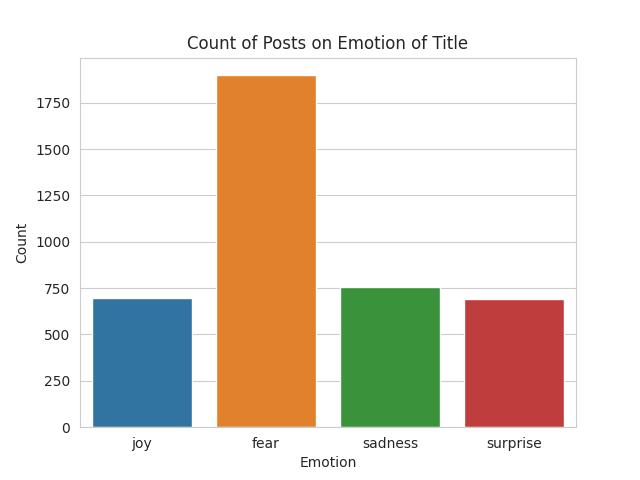

In [152]:
plt = plot_ct(grouped_pd, 'title_emotion', 'Emotion', "Count of Posts on Emotion of Title")
%matplot plt

In [146]:
ct_emotion_cmt_body = df_comments.groupBy('comment_body_emotion').count()
ct_emotion_cmt_body.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|comment_body_emotion|count|
+--------------------+-----+
|                 joy| 2710|
|                fear|10145|
|             sadness| 2869|
|            surprise| 2780|
+--------------------+-----+

In [153]:
grouped_pd = ct_emotion_cmt_body.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

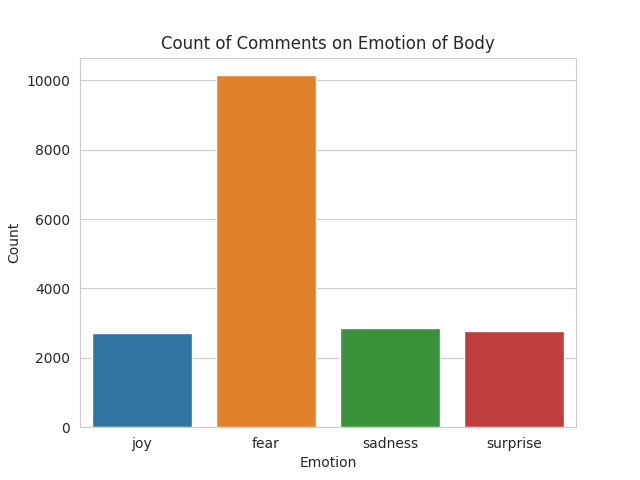

In [154]:
plt = plot_ct(grouped_pd, 'comment_body_emotion', 'Emotion', "Count of Comments on Emotion of Body")
%matplot plt

#### Moral Conviction vs. Emotion

In [ ]:
df_posts[['body_emotion', 'moral_conviction', '']]

In [158]:
posts_body_moral_emotion = df_posts.groupBy("moral_conviction", "body_emotion").count()
posts_title_moral_emotion = df_posts.groupBy("moral_conviction", "title_emotion").count()
cmts_body_moral_emotion = df_comments.groupBy("moral_conviction", "comment_body_emotion").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [159]:
grouped_pd = posts_body_moral_emotion.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

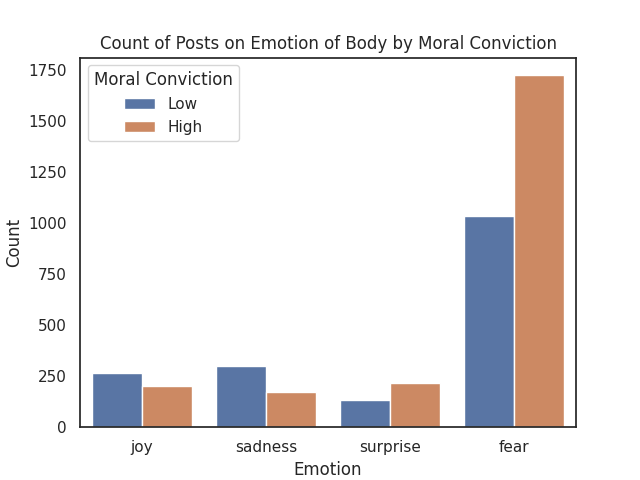

In [166]:
plt.close()

sns.set(style='white')

ax = sns.barplot(x='body_emotion', y='count', hue='moral_conviction', data=grouped_pd) 

plt.title("Count of Posts on Emotion of Body by Moral Conviction")
plt.xlabel("Emotion")
plt.ylabel("Count")

legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Low', 'High'],
          title='Moral Conviction')

%matplot plt

In [168]:
grouped_pd = posts_title_moral_emotion.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

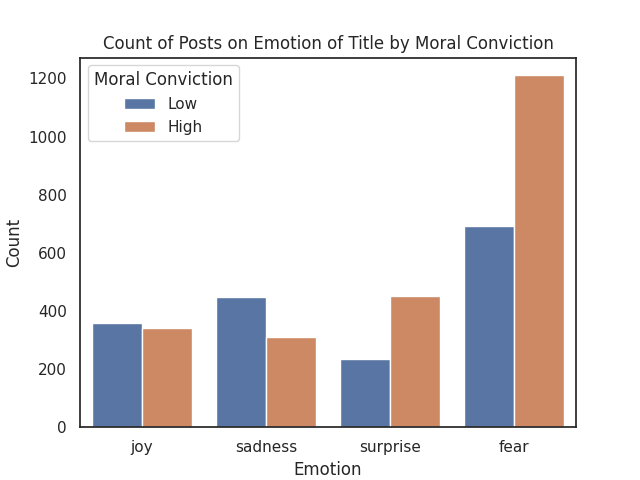

In [169]:
plt.close()

sns.set(style='white')

ax = sns.barplot(x='title_emotion', y='count', hue='moral_conviction', data=grouped_pd) 

plt.title("Count of Posts on Emotion of Title by Moral Conviction")
plt.xlabel("Emotion")
plt.ylabel("Count")

legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Low', 'High'],
          title='Moral Conviction')

%matplot plt

In [170]:
grouped_pd = cmts_body_moral_emotion.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

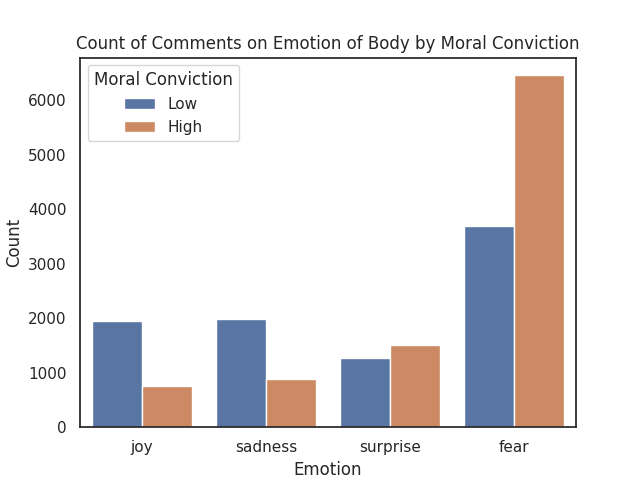

In [171]:
plt.close()

sns.set(style='white')

ax = sns.barplot(x='comment_body_emotion', y='count', hue='moral_conviction', data=grouped_pd) 

plt.title("Count of Comments on Emotion of Body by Moral Conviction")
plt.xlabel("Emotion")
plt.ylabel("Count")

legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Low', 'High'],
          title='Moral Conviction')

%matplot plt

In [172]:
df_posts.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- title: string (nullable = true)
 |-- body: string (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)
 |-- url: string (nullable = true)
 |-- comms_num: long (nullable = true)
 |-- ups: long (nullable = true)
 |-- topic: string (nullable = true)
 |-- moral_conviction: integer (nullable = true)
 |-- engagement: long (nullable = true)
 |-- binary_engage: integer (nullable = false)
 |-- body_intensity: string (nullable = true)
 |-- body_valence: string (nullable = true)
 |-- title_intensity: string (nullable = true)
 |-- title_valence: string (nullable = true)
 |-- abs_body_intensity: double (nullable = true)
 |-- abs_title_intensity: double (nullable = true)
 |-- body_emotion: string (nullable = true)
 |-- title_emotion: string (nullable = true)

In [189]:
from pyspark.sql.functions import log

df_select = df_posts.filter(col('engagement') > 0)
df_select = df_select.withColumn('log_engagement', log(col('engagement')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [215]:
df_select_cmt = df_comments.filter(col('engagement') > 0)
df_select_cmt = df_select_cmt.withColumn('log_engagement', log(col('engagement')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [190]:
posts_emotion_engage = df_select[['log_engagement', 'body_emotion', 'moral_conviction', "title_emotion"]]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [216]:
cmts_emotion_engage = df_select_cmt[['log_engagement', 'comment_body_emotion', 'moral_conviction']]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [191]:
posts_emotion_engage_pd = posts_emotion_engage.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [217]:
cmts_emotion_engage_pd = cmts_emotion_engage.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [211]:
posts_fear_engage_pd = posts_emotion_engage_pd[posts_emotion_engage_pd['body_emotion']=='fear']
posts_sadness_engage_pd = posts_emotion_engage_pd[posts_emotion_engage_pd['body_emotion']=='sadness']
posts_joy_engage_pd = posts_emotion_engage_pd[posts_emotion_engage_pd['body_emotion']=='joy']
posts_surprise_engage_pd = posts_emotion_engage_pd[posts_emotion_engage_pd['body_emotion']=='surprise']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

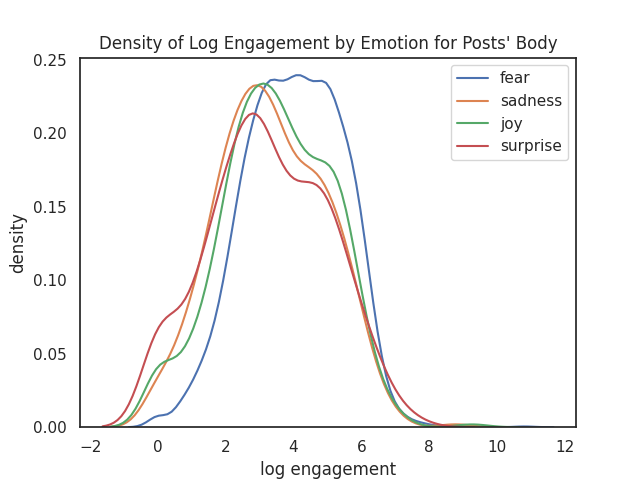

In [214]:
plt.close()
sns.kdeplot(data=posts_fear_engage_pd['log_engagement'], label='fear')
sns.kdeplot(data=posts_sadness_engage_pd['log_engagement'], label='sadness')
sns.kdeplot(data=posts_joy_engage_pd['log_engagement'], label='joy')
sns.kdeplot(data=posts_surprise_engage_pd['log_engagement'], label='surprise')

plt.legend()
plt.xlabel('log engagement')
plt.ylabel('density')
plt.title("Density of Log Engagement by Emotion for Posts' Body")

%matplot plt

In [219]:
cmts_fear_engage_pd = cmts_emotion_engage_pd[cmts_emotion_engage_pd['comment_body_emotion']=='fear']
cmts_sadness_engage_pd = cmts_emotion_engage_pd[cmts_emotion_engage_pd['comment_body_emotion']=='sadness']
cmts_joy_engage_pd = cmts_emotion_engage_pd[cmts_emotion_engage_pd['comment_body_emotion']=='joy']
cmts_surprise_engage_pd = cmts_emotion_engage_pd[cmts_emotion_engage_pd['comment_body_emotion']=='surprise']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

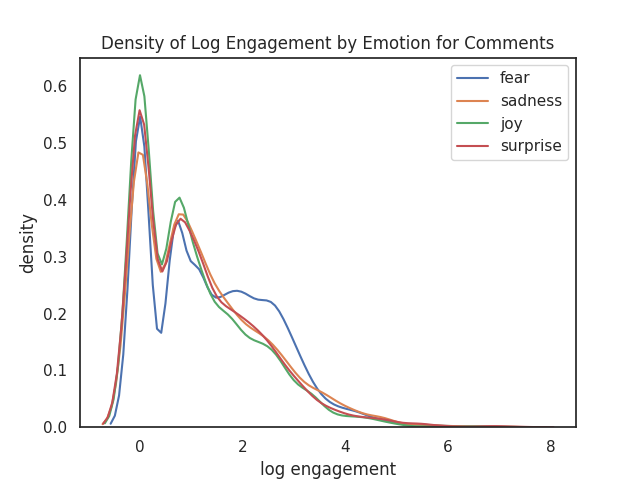

In [220]:
plt.close()
sns.kdeplot(data=cmts_fear_engage_pd['log_engagement'], label='fear')
sns.kdeplot(data=cmts_sadness_engage_pd['log_engagement'], label='sadness')
sns.kdeplot(data=cmts_joy_engage_pd['log_engagement'], label='joy')
sns.kdeplot(data=cmts_surprise_engage_pd['log_engagement'], label='surprise')

plt.legend()
plt.xlabel('log engagement')
plt.ylabel('density')
plt.title("Density of Log Engagement by Emotion for Comments")

%matplot plt

### 4. Statistical Analysis

- Linear Regression <br>
    - IV: absolute sentiment intensity
    - DV: log-transformed non-zero engagement 
    - four groups: <br>
        - valence (2) x moral conviction level (2)
    - posts' body, posts' title, comments' body


In [82]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

def linear_regression(df, body, valence, moral): 
    if moral == 'high':
        mc = 1
    else:
        mc = 0
        
    if body:
        col2 = 'body_valence'
        f1 = 'abs_body_intensity'
    else:
        col2 = 'title_valence'
        f1 = 'abs_title_intensity'
    
    # select based on moral conviction level and valence
    df_select = df.filter((col('moral_conviction')==mc) & (col(col2)==valence))
    df_select = df_select.filter(col('engagement') > 0) #select non-zero engagement
    
    df_select = df_select.withColumn(f1, col(f1).cast("double"))
    
    # log-transformed engagement
    df_select = df_select.withColumn('log_engagement', log(col('engagement')))
    
    features = [f1]
    assembler = VectorAssembler(inputCols = features, outputCol = 'features')
    df_select = assembler.transform(df_select)
    
    lr = LinearRegression(featuresCol='features', labelCol='log_engagement')
    model = lr.fit(df_select)
    
    return model

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [83]:
from pyspark.sql.types import StringType, StructField, StructType, DoubleType

def model_summary(model):
    intercept = float(model.intercept)
    coefficients = [float(coef) for coef in model.coefficients]
    p_values = [float(p) for p in model.summary.pValues]
    std_errors = [float(se) for se in model.summary.coefficientStandardErrors]
    t_values = [float(tv) for tv in model.summary.tValues]


    rows = []
    for i in range(len(model.coefficients)+1):
        if i == 0:
            v0 = 'intercept'
            v1 = intercept
        else:
            v0 = f'coeff'
            v1 = coefficients[i - 1]
        row = (v0, v1, std_errors[i], p_values[i], t_values[i])
        rows.append(row)

    schema = StructType([
        StructField("", StringType(), True),
        StructField("value", DoubleType(), True),
        StructField("std_err", DoubleType(), True),
        StructField("p_value", DoubleType(), True),
        StructField("t_value", DoubleType(), True)])


    df_summary_lr = spark.createDataFrame(data=rows,schema=schema)
    return df_summary_lr  

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Posts' Body

In [84]:
lr_body_pos_high = linear_regression(df_posts, True, 'pos', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [85]:
summary_body_pos_high = model_summary(lr_body_pos_high)
summary_body_pos_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+-------------------+-------------------+
|         |             value|            std_err|            p_value|            t_value|
+---------+------------------+-------------------+-------------------+-------------------+
|intercept| 4.085213709439226| 0.1775955612396094|0.43013040881936293|-0.7892945275058457|
|    coeff|-0.140175204595753|0.13053499661937087|                0.0| 31.295926879680913|
+---------+------------------+-------------------+-------------------+-------------------+

In [86]:
lr_body_pos_low = linear_regression(df_posts, True, 'pos', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
summary_body_pos_low = model_summary(lr_body_pos_low)
summary_body_pos_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+------------------+------------------+
|         |             value|            std_err|           p_value|           t_value|
+---------+------------------+-------------------+------------------+------------------+
|intercept| 2.763643258328392|  0.169716160186795|2.0069125456601E-5| 4.280250476339083|
|    coeff|0.7264276754819695|0.13700073025035475|               0.0|20.172471002732017|
+---------+------------------+-------------------+------------------+------------------+

In [88]:
lr_body_neg_high = linear_regression(df_posts, True, 'neg', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
summary_body_neg_high = model_summary(lr_body_neg_high)
summary_body_neg_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+--------------------+-----------------+
|         |             value|            std_err|             p_value|          t_value|
+---------+------------------+-------------------+--------------------+-----------------+
|intercept|3.7537744632534706|0.14716100553339936|2.429247247803800...|6.014017999189949|
|    coeff|0.8850289360567555|0.11683584705966378|                 0.0|32.12861940682089|
+---------+------------------+-------------------+--------------------+-----------------+

In [90]:
lr_body_neg_low = linear_regression(df_posts, True, 'neg', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
summary_body_neg_low = model_summary(lr_body_neg_low)
summary_body_neg_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+-------------------+-------------------+------------------+
|         |              value|            std_err|            p_value|           t_value|
+---------+-------------------+-------------------+-------------------+------------------+
|intercept|  3.100484505588411|  0.286961631337917|0.13261924885305554|1.5076008498122537|
|    coeff|0.43262359926855437|0.18887495104762547|                0.0|16.415541014788207|
+---------+-------------------+-------------------+-------------------+------------------+

#### Visualize linear regression results

In [92]:
def df_to_pd(df, body, valence, moral, frac):
    if body:
        col2 = 'body_valence'
    else:
        col2 = 'title_valence'
    
    if moral == 'high':
        mc = 1
    else:
        mc = 0
     
    df_select = df.filter((col('moral_conviction')==mc) & (col(col2)==valence))
    df_select = df_select.filter(col('engagement') > 0)
    df_sample = df_select.sample(fraction=frac)
    df_sample = df_sample.withColumn('log_engagement', log(col('engagement')))

    pd_sample = df_sample.toPandas()
    return pd_sample

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [93]:
def linear_reg_plot(pd, model, body, valence, moral, content):
    coeff = model.coefficients[0]
    intercept = model.intercept
    
    if body:
        column = 'abs_body_intensity'
    else:
        column = 'abs_title_intensity'
        
    
    if valence == 'pos':
        label1 = 'Positive'
    else:
        label1 = 'Negative'
        
    if moral == 'high':
        label2 = 'High'
    else:
        label2 = 'Low'
    
    pred = pd[column] * coeff + intercept

    plt.close()
    
    plt.scatter(pd[column], pd['log_engagement'])
    plt.plot(pd[column], pred, color='red', label='Linear Regression')
    
    plt.title(f'Linear Rregression for {content} with {label2}-level Moral Conviction',
             fontsize = 10)
    plt.xlabel(f'{label1} Absolute Intensity')
    plt.ylabel('Log-transformed Engagement')
    plt.legend()
    
    return plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
posts_body_neg_high_pd = df_to_pd(df_posts, True, 'neg', 'high', 0.3)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

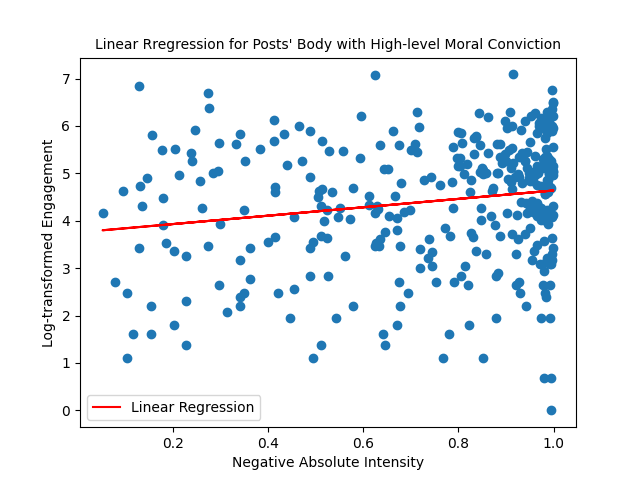

In [115]:
plt = linear_reg_plot(posts_body_neg_high_pd, lr_body_neg_high, True, 'neg', 'high', "Posts' Body")
%matplot plt

In [96]:
posts_body_pos_low_pd = df_to_pd(df_posts, True, 'pos', 'low', 0.3)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

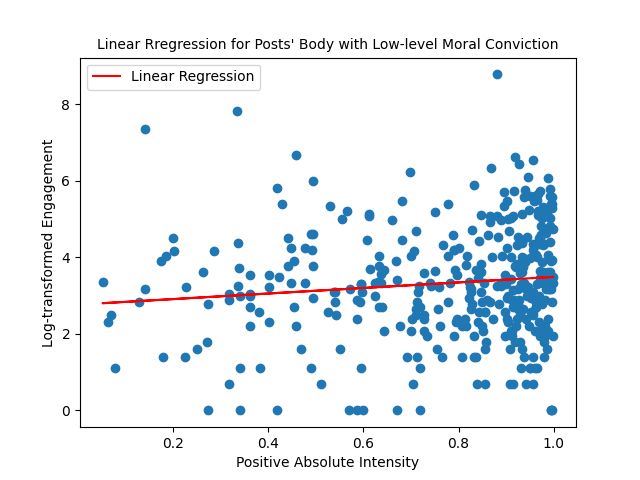

In [116]:
plt = linear_reg_plot(posts_body_pos_low_pd, lr_body_pos_low, True, 'pos', 'low', "Posts' Body")
%matplot plt

#### Posts' Title

In [98]:
lr_title_pos_high = linear_regression(df_posts, False, 'pos', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
summary_title_pos_high = model_summary(lr_title_pos_high)
summary_title_pos_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+-------------------+------------------+-------------------+
|         |               value|            std_err|           p_value|            t_value|
+---------+--------------------+-------------------+------------------+-------------------+
|intercept|   4.231326887982125|0.30447105046687395|0.7488694410760093|-0.3202915174163911|
|    coeff|-0.09751949476339765|0.13968734597671362|               0.0| 30.291411569144586|
+---------+--------------------+-------------------+------------------+-------------------+

In [100]:
lr_title_pos_low = linear_regression(df_posts, False, 'pos', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
summary_title_pos_low = model_summary(lr_title_pos_low)
summary_title_pos_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+------------------+------------------+
|         |             value|            std_err|           p_value|           t_value|
+---------+------------------+-------------------+------------------+------------------+
|intercept|3.2390038473603298| 0.3162291513491874|0.3135807025988293|1.0085323512428281|
|    coeff|0.3189273295417201|0.16104480185650438|               0.0|20.112439582162835|
+---------+------------------+-------------------+------------------+------------------+

In [102]:
lr_title_neg_high = linear_regression(df_posts, False, 'neg', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [103]:
summary_title_neg_high = model_summary(lr_title_neg_high)
summary_title_neg_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+--------------------+------------------+
|         |             value|            std_err|             p_value|           t_value|
+---------+------------------+-------------------+--------------------+------------------+
|intercept| 4.079646666071426|0.23343385480850568|0.002458747289111...|3.0388115058757372|
|    coeff|0.7093614838530133|0.12385840066823396|                 0.0|32.937989220441594|
+---------+------------------+-------------------+--------------------+------------------+

In [104]:
lr_title_neg_low = linear_regression(df_posts, False, 'neg', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [105]:
summary_title_neg_low = model_summary(lr_title_neg_low)
summary_title_neg_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+------------------+------------------+
|         |             value|            std_err|           p_value|           t_value|
+---------+------------------+-------------------+------------------+------------------+
|intercept|3.2785865696351593|0.43956120856035813|0.0933876638488047| 1.683143270796822|
|    coeff|0.7398444902916852|0.20831888811733926|               0.0|15.738306781804816|
+---------+------------------+-------------------+------------------+------------------+

#### Comments' Body

In [106]:
lr_cmt_pos_high = linear_regression(df_comments, True, 'pos', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
summary_cmt_pos_high = model_summary(lr_cmt_pos_high)
summary_cmt_pos_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+-------------------+-------------------+------------------+
|         |              value|            std_err|            p_value|           t_value|
+---------+-------------------+-------------------+-------------------+------------------+
|intercept| 1.3703127522500012|0.06981740207018786|0.29881621814483195|1.0391148993903385|
|    coeff|0.07254830272785806|0.04372922559409001|                0.0|31.336314184242003|
+---------+-------------------+-------------------+-------------------+------------------+

In [108]:
lr_cmt_pos_low = linear_regression(df_comments, True, 'pos', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [109]:
summary_cmt_pos_low = model_summary(lr_cmt_pos_low)
summary_cmt_pos_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+-------------------+--------------------+------------------+
|         |             value|            std_err|             p_value|           t_value|
+---------+------------------+-------------------+--------------------+------------------+
|intercept|0.9747400943833988|0.06887972743309108|5.970591604231856E-6| 4.533135446521047|
|    coeff|0.3122411339736534|0.04847576301499646|                 0.0|20.107782400080083|
+---------+------------------+-------------------+--------------------+------------------+

In [110]:
lr_cmt_neg_high = linear_regression(df_comments, True, 'neg', 'high')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
summary_cmt_neg_high = model_summary(lr_cmt_neg_high)
summary_cmt_neg_high.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+--------------------+--------------------+------------------+
|         |              value|             std_err|             p_value|           t_value|
+---------+-------------------+--------------------+--------------------+------------------+
|intercept| 1.4005530339729226| 0.06802576201295182|5.347991183235479E-8| 5.449659475179972|
|    coeff|0.37071723851022076|0.045817770318512877|                 0.0|30.567900276173475|
+---------+-------------------+--------------------+--------------------+------------------+

In [112]:
lr_cmt_neg_low = linear_regression(df_comments, True, 'neg', 'low')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
summary_cmt_neg_low = model_summary(lr_cmt_neg_low)
summary_cmt_neg_low.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+-------------------+------------------+-------------------+
|         |               value|            std_err|           p_value|            t_value|
+---------+--------------------+-------------------+------------------+-------------------+
|intercept|  1.0921615835460052|0.10983804498892619|0.9284119181682422|0.08985476440714146|
|    coeff|0.009869471655420967|0.06372910716405966|               0.0|   17.1375629150809|
+---------+--------------------+-------------------+------------------+-------------------+